In [ ]:
#| default_exp basic_plots

In [ ]:
#| hide
from nbdev.showdoc import *

In [ ]:
#| export

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from typing import Optional
from PIL import Image
from smart_open import open

In [ ]:
#| export

from pheno_utils.config import (
    FEMALE_COLOR, 
    MALE_COLOR, 
    generate_synthetic_data
    )

In [ ]:
#| export

def hist_ecdf_plots(data: pd.DataFrame, col: str, feature_str: Optional[str] = None,
                    gender_col: str = "sex") -> None:
    """
    Plots histograms and empirical cumulative distribution functions (ECDFs) from a DataFrame
    for a specific column.

    Args:
        data: The input DataFrame containing the data to plot.
        col: The column name to plot.
        feature_str: The title of the plot. If not provided, the column name will be used.
        gender_col: The column name indicating sex (default is 'sex' - female:0; male:1).

    Returns:
        None
    """
    try:
        assert col in data.columns, f"Column {col} not found in data"
        assert gender_col in data.columns, f"Gender column {gender_col} not found in data"
    except AssertionError as e:
        print(e)
        return

    if feature_str is None:
        feature_str = col

    idx_male = data[gender_col] == 1
    idx_female = data[gender_col] == 0

    fig, axes = plt.subplots(1, 2, figsize=(10, 4))

    # Plot histograms
    ax = axes[0]
    sns.histplot(data.loc[idx_female, col], ax=ax, color=FEMALE_COLOR,
                 label=f'females (N={(data.loc[idx_female, col].count()):,})', alpha=0.5)
    sns.histplot(data.loc[idx_male, col], ax=ax, color=MALE_COLOR,
                 label=f'males (N={(data.loc[idx_male, col].count()):,})', alpha=0.5)
    ax.spines["right"].set_visible(False)
    ax.spines["top"].set_visible(False)
    ax.legend()

    # Plot ECDFs
    ax = axes[1]
    sns.ecdfplot(data.loc[idx_female, col], ax=ax, color=FEMALE_COLOR,
                 label=f'females (N={(data.loc[idx_female, col].count()):,})')
    sns.ecdfplot(data.loc[idx_male, col], ax=ax, color=MALE_COLOR,
                 label=f'males (N={(data.loc[idx_male, col].count()):,})')
    ax.spines["right"].set_visible(False)
    ax.spines["top"].set_visible(False)
    ax.legend()

    fig.suptitle(f"{feature_str}")
    fig.tight_layout()
    plt.show()

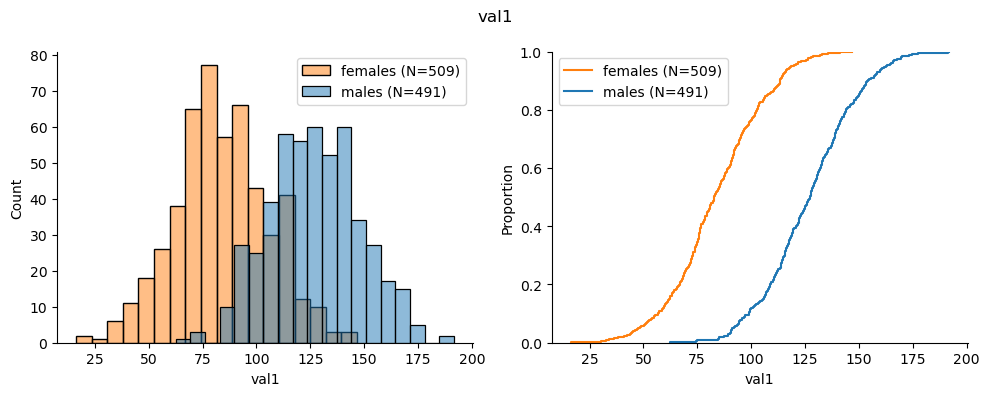

In [ ]:
data = generate_synthetic_data(n=1000)
hist_ecdf_plots(data=data, col="val1")

In [ ]:
#| export

def show_fundus(fname: str) -> None:
    """
    Display a fundus image from an input file path.
    Args:
        fname (str): The file path to the fundus image.
    """
    fig, ax = plt.subplots(1, 1, figsize=(6, 6))
    img = Image.open(open(fname, 'rb'))
    ax.imshow(img, cmap="gray")
    ax.set_xticks([])
    ax.set_yticks([])
    ax.axis('off')

In [ ]:
#| hide
import nbdev; nbdev.nbdev_export()